# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


# IMPORTING DATASETS

In [ ]:
uploaded1 = files.upload()

Saving train.csv to train.csv


In [ ]:
uploaded2=files.upload()

Saving test.csv to test.csv


In [ ]:
uploaded3=files.upload()

Saving gender_submission.csv to gender_submission.csv


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
gender_df=pd.read_csv('gender_submission.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION



In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [ ]:
df_test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [ ]:
def null_table():
  null_train = df_train.isnull().sum()
  null_test = df_test.isnull().sum()
  null_table=pd.DataFrame({'null_train' : null_train ,
                           'null_test' : null_test,
                           'null_train_per(%)' : round((null_train/len(df_train))*100, 2),
                        'null_test_per(%)' : round((null_test/len(df_test))*100, 2)})
  return null_table

In [ ]:
null_table()

,null_train,null_test,null_train_per(%),null_test_per(%)
Age,177,86.0,19.87,20.57
Cabin,687,327.0,77.10,78.23
Embarked,2,0.0,0.22,0.00
Fare,0,1.0,0.00,0.24
Name,0,0.0,0.00,0.00
Parch,0,0.0,0.00,0.00
PassengerId,0,0.0,0.00,0.00
Pclass,0,0.0,0.00,0.00
Sex,0,0.0,0.00,0.00
SibSp,0,0.0,0.00,0.00


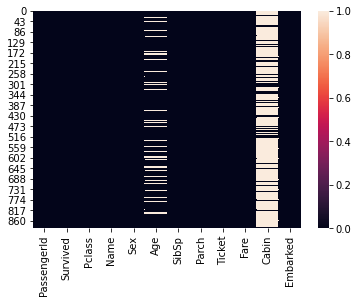

In [ ]:
sns.heatmap(df_train.isnull())

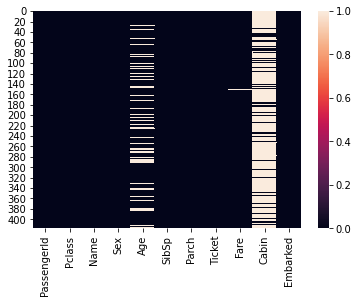

In [ ]:
sns.heatmap(df_test.isnull())

In [ ]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].mean())

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

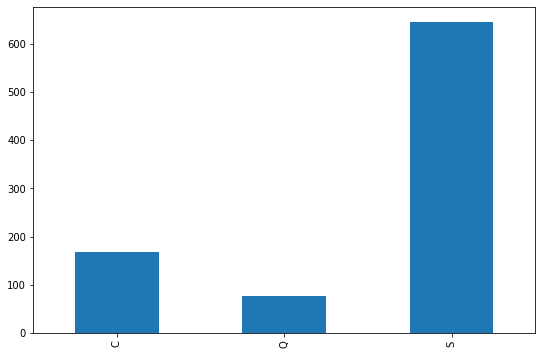

In [ ]:
count=df_train['Embarked'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
count.plot.bar(ax=ax)
plt.show()


In [ ]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [ ]:
df_train['Embarked'].isnull().sum()

0

In [ ]:
df_train=df_train.drop(['Ticket','Cabin'],axis=1)
df_test=df_test.drop(['Ticket','Cabin'],axis=1)

In [ ]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
null_table()

,null_train,null_test,null_train_per(%),null_test_per(%)
Age,0,0.0,0.0,0.00
Embarked,0,0.0,0.0,0.00
Fare,0,1.0,0.0,0.24
Name,0,0.0,0.0,0.00
Parch,0,0.0,0.0,0.00
PassengerId,0,0.0,0.0,0.00
Pclass,0,0.0,0.0,0.00
Sex,0,0.0,0.0,0.00
SibSp,0,0.0,0.0,0.00
Survived,0,NaN,0.0,NaN


In [ ]:
df_train.isnull().sum().sort_values(ascending = False)

Embarked       0
Fare           0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [ ]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train[['Survived','Sex']].groupby('Sex',as_index=False).mean().sort_values(by='Survived' ,ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


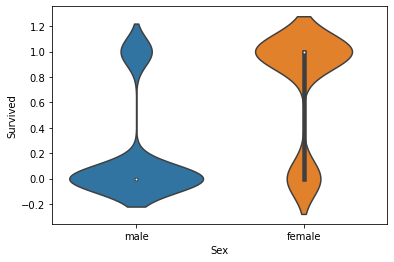

In [ ]:
sns.violinplot(df_train['Sex'] , df_train['Survived'])
plt.show()

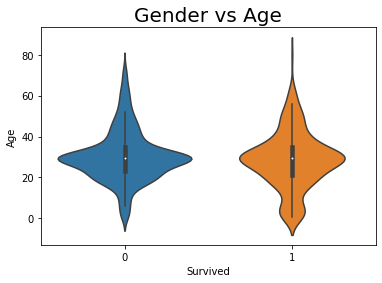

In [ ]:
sns.violinplot(x=df_train['Survived'] , y= df_train['Age'])
plt.title('Gender vs Age', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


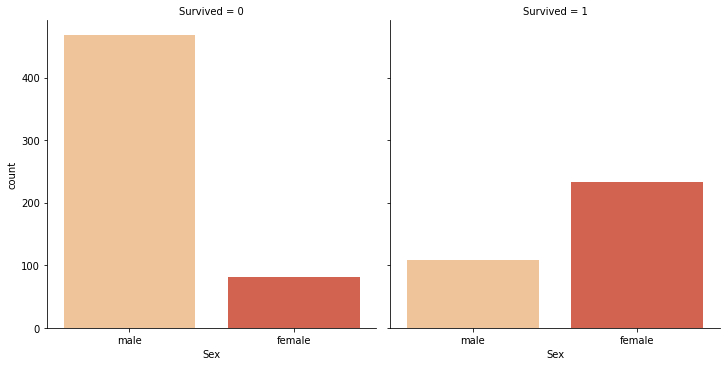

In [ ]:
sns.factorplot('Sex', col = 'Survived', data = df_train, kind ='count',
               palette = "OrRd")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


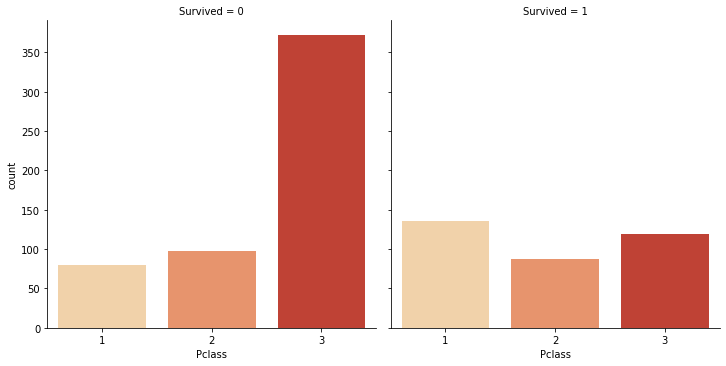

In [ ]:
sns.factorplot('Pclass', col = 'Survived', data = df_train, kind ='count',
               palette = "OrRd")

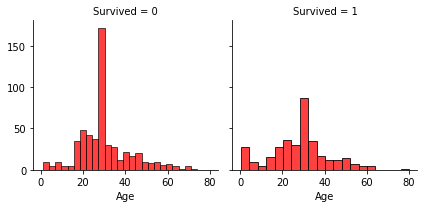

In [ ]:
chart=sns.FacetGrid(df_train,col='Survived')
chart.map(sns.histplot,'Age' , color='red')
plt.show()

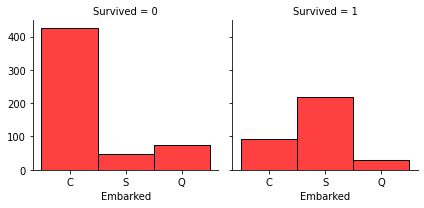

In [ ]:

chart=sns.FacetGrid(df_train,col='Survived')
chart.map(sns.histplot,'Embarked' , color='red')
plt.show()

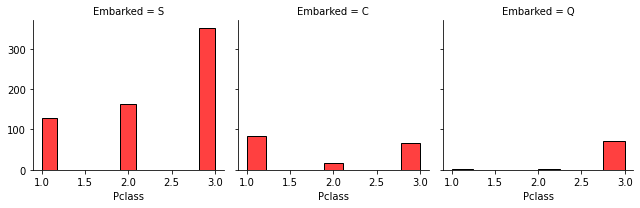

In [ ]:
chart=sns.FacetGrid(df_train,col='Embarked')
chart.map(sns.histplot,'Pclass' , color='red')
plt.show()

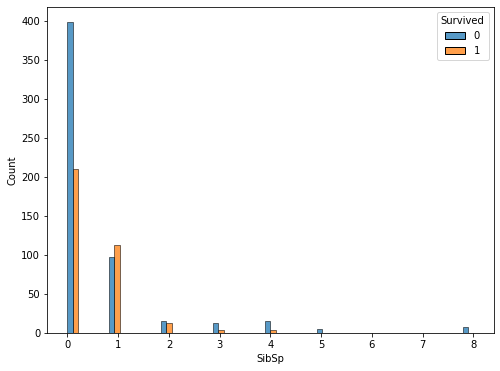

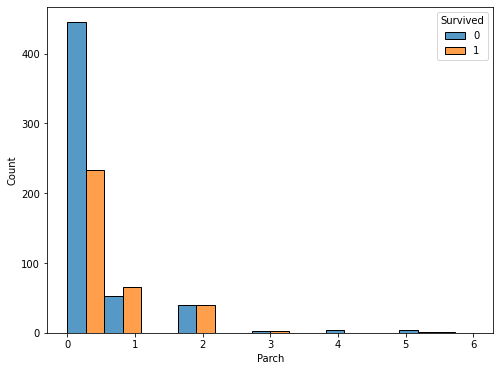

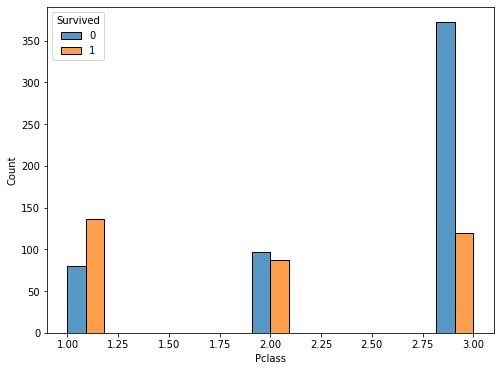

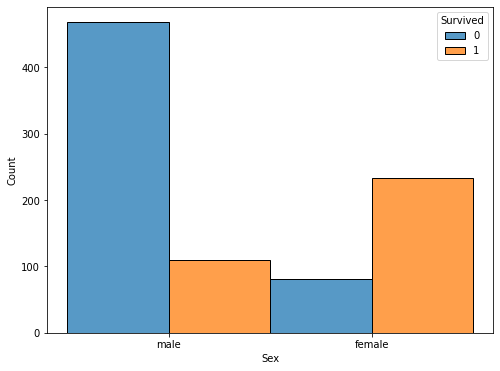

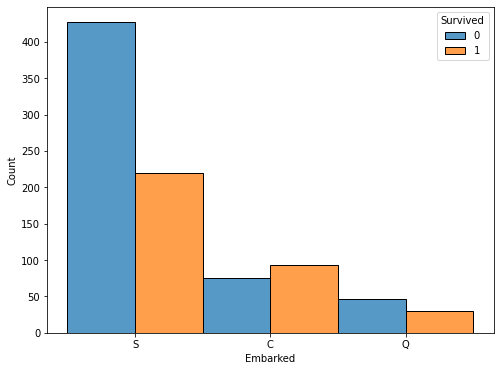

In [ ]:
feature = ['SibSp', 'Parch', 'Pclass', 'Sex','Embarked']
for feat in feature:
    f, x = plt.subplots(figsize=(8, 6))
    sns.histplot(data=df_train, x=feat, hue="Survived", multiple="dodge")
    plt.show()

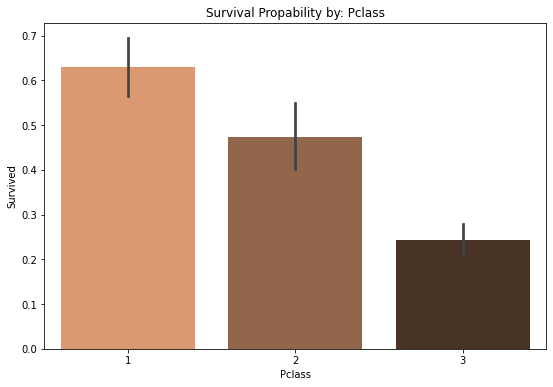

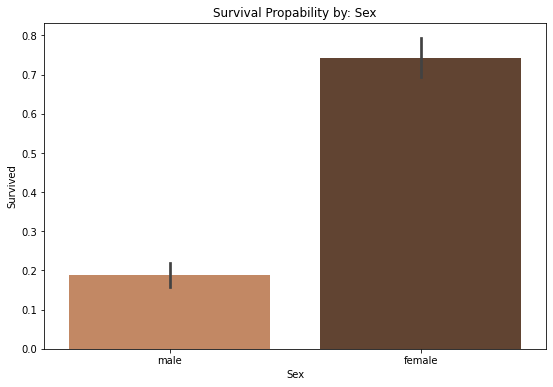

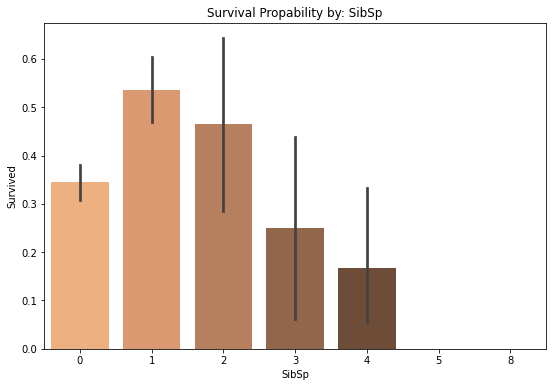

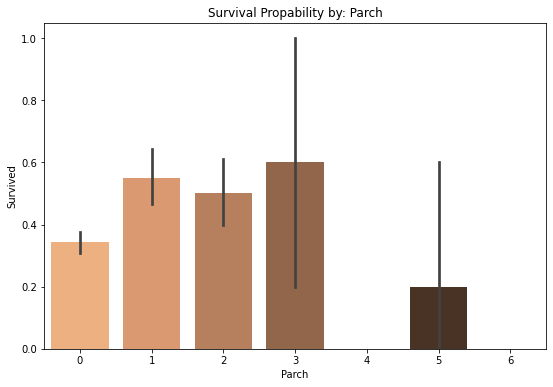

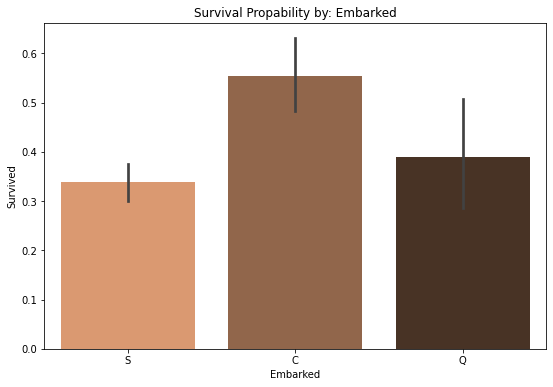

In [ ]:
datas=[ 'Pclass', 'Sex', 'SibSp','Parch', 'Embarked']
for col in datas:
  fig=plt.figure(figsize=(9,6))
  sns.barplot(x = df_train[col] , y = df_train['Survived'],palette = "copper_r")
  plt.title('Survival Propability by: '+ col)
plt.show()

In [ ]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [ ]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
df=pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

In [ ]:
df.shape

(1309, 10)

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,False,False,False,False,False
1305,False,True,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False
1307,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

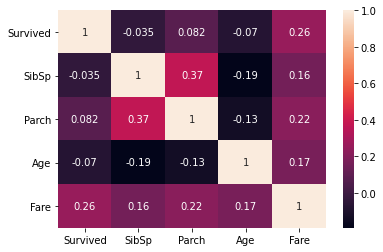

In [ ]:
sns.heatmap(df[['Survived', 'SibSp','Parch', 'Age','Fare']].corr() , annot=True)

In [ ]:
df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
df[['Survived','SibSp']].groupby('Survived',as_index=False).mean()

,Survived,SibSp
0,0.0,0.553734
1,1.0,0.473684


In [ ]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [ ]:
df[['Survived','Parch']].groupby('Survived' , as_index=False).mean()

,Survived,Parch
0,0.0,0.329690
1,1.0,0.464912


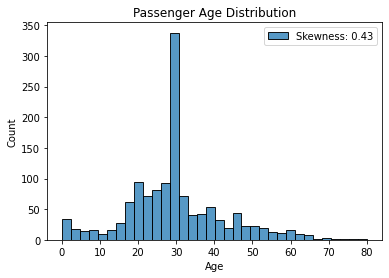

In [ ]:
sns.histplot(df['Age'],label='Skewness: %.2f'%(df_train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passenger Age Distribution')
plt.show()


In [ ]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [ ]:
df['Sex'] = df['Sex'].replace({'male' : 0 , 'female': 1})

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [ ]:
df['Title'] = [name.split(",")[1].split('.')[0].strip() for name in df['Name']]


In [ ]:
df[['Name' , 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [ ]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
Mme               1
Don               1
Sir               1
Capt              1
Jonkheer          1
the Countess      1
Lady              1
Name: Title, dtype: int64

In [ ]:
df['Title'] = df['Title'].replace(['Dr','Rev','Col',
                                'Major','Lady','Jonkheer','Don',
                                 'the Countess','Sir','Dona'],'Rare')

df['Title'] = df['Title'].replace(['Mlle' , 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [ ]:
df['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       28
Capt        1
Name: Title, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


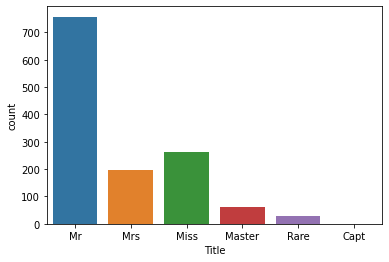

In [ ]:
sns.countplot(df['Title'] )
plt.show()

In [ ]:
#df.groupby('Title')['Survived'].mean()

In [ ]:
df[['Title' , 'Survived']].groupby('Title', as_index = False).mean()
#df.groupby('Title')['Survived'].count()

,Title,Survived
0,Capt,0.000000
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.363636


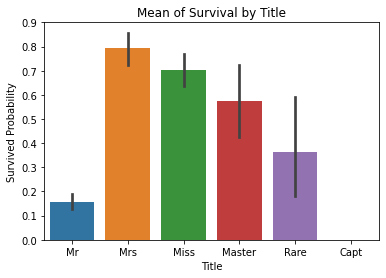

In [ ]:

sns.barplot(x=df['Title'] , y = df['Survived'])
plt.ylabel("Survived Probability")
plt.title("Mean of Survival by Title")
plt.show()

In [ ]:
df= df.drop('Name'  ,axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.000000,1,0,7.2500,S,Mr
1,2,1.0,1,1,38.000000,1,0,71.2833,C,Mrs
2,3,1.0,3,1,26.000000,0,0,7.9250,S,Miss
3,4,1.0,1,1,35.000000,1,0,53.1000,S,Mrs
4,5,0.0,3,0,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,29.699118,0,0,8.0500,S,Mr
1305,1306,NaN,1,1,39.000000,0,0,108.9000,C,Rare
1306,1307,NaN,3,0,38.500000,0,0,7.2500,S,Mr
1307,1308,NaN,3,0,29.699118,0,0,8.0500,S,Mr


In [ ]:
new_df= pd.get_dummies(df , columns= ['Title'])


In [ ]:

new_df = pd.get_dummies(new_df , columns= ['Embarked'], prefix = 'Em')

In [ ]:
new_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,7.2500,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,71.2833,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,7.9250,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,1,0,53.1000,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,0,8.0500,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,1,0,0,8.0500,0,0,0,1,0,0,0,0,1
1305,1306,NaN,1,1,2,0,0,108.9000,0,0,0,0,0,1,1,0,0
1306,1307,NaN,3,0,2,0,0,7.2500,0,0,0,1,0,0,0,0,1
1307,1308,NaN,3,0,1,0,0,8.0500,0,0,0,1,0,0,0,0,1


In [ ]:
new_df['Age']=new_df['Age'].astype(int)

In [ ]:
#df.loc[df['month']=='march' , 'month'] = 3


In [ ]:
new_df.loc[new_df['Age'] < 16 , 'Age']=0
new_df.loc[(new_df['Age'] >= 16) & (new_df['Age']<=32) , 'Age' ]=1
new_df.loc[(new_df['Age'] > 32 ) & (new_df['Age']<=48) , 'Age']=2
new_df.loc[(new_df['Age'] > 48) & (new_df['Age']<= 62) , 'Age']=3
new_df.loc[new_df['Age'] >  62, 'Age']=4

In [ ]:
new_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,7.2500,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,71.2833,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,7.9250,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,1,0,53.1000,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,0,8.0500,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,1,0,0,8.0500,0,0,0,1,0,0,0,0,1
1305,1306,NaN,1,1,2,0,0,108.9000,0,0,0,0,0,1,1,0,0
1306,1307,NaN,3,0,2,0,0,7.2500,0,0,0,1,0,0,0,0,1
1307,1308,NaN,3,0,1,0,0,8.0500,0,0,0,1,0,0,0,0,1


In [ ]:
train = new_df[:len(df_train)]
print(len(train))
test = new_df[len(df_train):]
print(len(test))

891
418


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,7.2500,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,1,0,71.2833,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,0,7.9250,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,1,0,53.1000,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,0,8.0500,0,0,0,1,0,0,0,0,1


In [ ]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,0,0,7.8292,0,0,0,1,0,0,0,1,0
892,893,NaN,3,1,2,1,0,7.0000,0,0,0,0,1,0,0,0,1
893,894,NaN,2,0,3,0,0,9.6875,0,0,0,1,0,0,0,1,0
894,895,NaN,3,0,1,0,0,8.6625,0,0,0,1,0,0,0,0,1
895,896,NaN,3,1,1,1,1,12.2875,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,1,0,0,8.0500,0,0,0,1,0,0,0,0,1
1305,1306,NaN,1,1,2,0,0,108.9000,0,0,0,0,0,1,1,0,0
1306,1307,NaN,3,0,2,0,0,7.2500,0,0,0,1,0,0,0,0,1
1307,1308,NaN,3,0,1,0,0,8.0500,0,0,0,1,0,0,0,0,1


In [ ]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
train['Survived'] =  train['Survived'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Modeling

In [ ]:
X_train = train.drop(["Survived", "PassengerId"], axis=1)
y_train = train["Survived"]
X_test  = test.drop(["PassengerId", "Survived"], axis=1)
y_test = gender_df['Survived']

In [ ]:
print(X_train.shape)
print(X_test.shape)

(891, 15)
(418, 15)


In [ ]:
print('X_train shape = ', X_train.shape)
print('Y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('Y_test shape = ', y_test.shape)

X_train shape =  (891, 15)
Y_train shape =  (891,)
X_test shape =  (418, 15)
Y_test shape =  (418,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# SVC

Testing Accurcy: 0.68 

Testing Accurcy: 0.65 

Accuracy Score: 0.65 

Precision: 0.55 

Recall: 0.26 

Confusion Metrix: 
 [[233  33]
 [112  40]] 



Text(0.5, 1.0, 'Accuracy Score: 0.65')

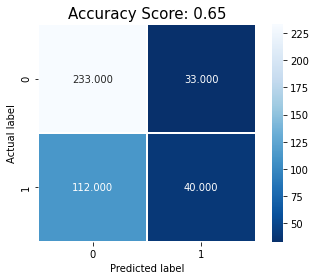

In [ ]:
Svc= SVC()
Svc.fit(X_train,y_train)
y_predict = Svc.predict(X_test)

# Training And Testing Accuracy

training_acc_SVC=round(Svc.score(X_train,y_train),2)
testing_acc_SVC=round(Svc.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_SVC ,'\n' )
print('Testing Accurcy:' , testing_acc_SVC ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)

# Linear SVC

Testing Accurcy: 0.83 

Testing Accurcy: 0.92 

Accuracy Score: 0.92 

Precision: 0.84 

Recall: 0.95 

Confusion Metrix: 
 [[239  27]
 [  7 145]] 



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'Accuracy Score: 0.92')

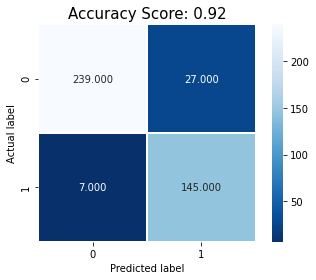

In [ ]:
LSvc = LinearSVC()
LSvc.fit(X_train,y_train)
y_predict = LSvc.predict(X_test)

# Training And Testing Accuracy

training_acc_LSVC=round(LSvc.score(X_train,y_train),2)
testing_acc_LSVC=round(LSvc.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_LSVC ,'\n' )
print('Testing Accurcy:' , testing_acc_LSVC ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)

# KNN

Testing Accurcy: 0.87 

Testing Accurcy: 0.79 

Accuracy Score: 0.79 

Precision: 0.7 

Recall: 0.75 

Confusion Metrix: 
 [[218  48]
 [ 38 114]] 



Text(0.5, 1.0, 'Accuracy Score: 0.79')

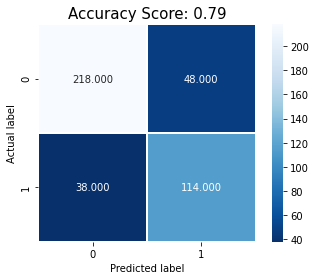

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train,y_train)
y_predict = KNN.predict(X_test)

# Training And Testing Accuracy

training_acc_KNN=round(KNN.score(X_train,y_train),2)
testing_acc_KNN=round(KNN.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_KNN ,'\n' )
print('Testing Accurcy:' , testing_acc_KNN ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)

# Naive Bayes

Testing Accurcy: 0.79 

Testing Accurcy: 0.87 

Accuracy Score: 0.87 

Precision: 0.74 

Recall: 0.98 

Confusion Metrix: 
 [[213  53]
 [  3 149]] 



Text(0.5, 1.0, 'Accuracy Score: 0.87')

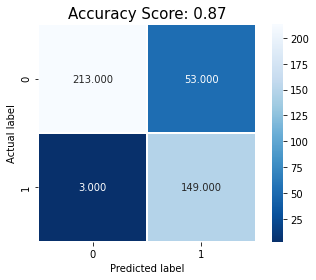

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_predict = GNB.predict(X_test)

# Training And Testing Accuracy

training_acc_GNB=round(GNB.score(X_train,y_train),2)
testing_acc_GNB=round(GNB.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_GNB ,'\n' )
print('Testing Accurcy:' , testing_acc_GNB ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)

# Random Forest Classifier

Testing Accurcy: 0.95 

Testing Accurcy: 0.85 

Accuracy Score: 0.85 

Precision: 0.78 

Recall: 0.82 

Confusion Metrix: 
 [[230  36]
 [ 27 125]] 



Text(0.5, 1.0, 'Accuracy Score: 0.85')

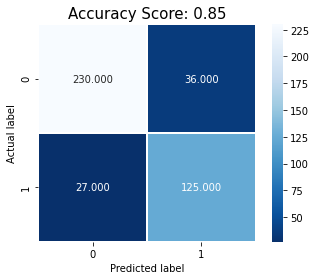

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_predict = RFC.predict(X_test)

# Training And Testing Accuracy

training_acc_RFC=round(RFC.score(X_train,y_train),2)
testing_acc_RFC=round(RFC.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_RFC ,'\n' )
print('Testing Accurcy:' , testing_acc_RFC ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)


# Perceptron

Testing Accurcy: 0.79 

Testing Accurcy: 0.85 

Accuracy Score: 0.85 

Precision: 0.78 

Recall: 0.82 

Confusion Metrix: 
 [[232  34]
 [ 28 124]] 



Text(0.5, 1.0, 'Accuracy Score: 0.85')

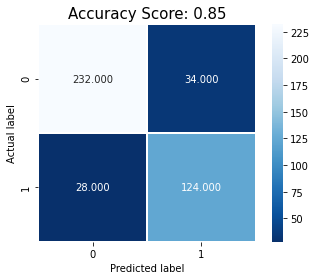

In [ ]:
PCE = Perceptron()
PCE.fit(X_train,y_train)
y_predict = PCE.predict(X_test)

# Training And Testing Accuracy

training_acc_PCE =round(PCE.score(X_train,y_train),2)
testing_acc_PCE=round(PCE.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_PCE ,'\n' )
print('Testing Accurcy:' , testing_acc_PCE ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)

# DecisionTreeClassifier

Testing Accurcy: 0.95 

Testing Accurcy: 0.84 

Accuracy Score: 0.84 

Precision: 0.77 

Recall: 0.8 

Confusion Metrix: 
 [[230  36]
 [ 31 121]] 



Text(0.5, 1.0, 'Accuracy Score: 0.84')

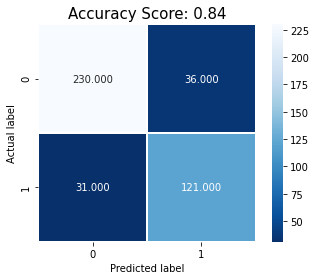

In [ ]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_predict = DTC.predict(X_test)

# Training And Testing Accuracy

training_acc_DTC=round(DTC.score(X_train,y_train),2)
testing_acc_DTC=round(DTC.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_DTC ,'\n' )
print('Testing Accurcy:' , testing_acc_DTC ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)

# Logistic Regression

Testing Accurcy: 0.83 

Testing Accurcy: 0.93 

Accuracy Score: 0.93 

Precision: 0.87 

Recall: 0.95 

Confusion Metrix: 
 [[244  22]
 [  8 144]] 



Text(0.5, 1.0, 'Accuracy Score: 0.93')

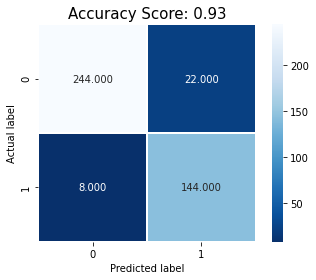

In [ ]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)
y_predict = LR.predict(X_test)

# Training And Testing Accuracy

training_acc_LR=round(LR.score(X_train,y_train),2)
testing_acc_LR=round(LR.score(X_test,y_test),2)

print('Testing Accurcy:' , training_acc_LR ,'\n' )
print('Testing Accurcy:' , testing_acc_LR ,'\n')

# Accuracy , Precision and Recall Score
print('Accuracy Score:',round(metrics.accuracy_score(y_test,y_predict),2),'\n')
print("Precision:",round(metrics.precision_score(y_test, y_predict),2),'\n' )
print("Recall:",round(metrics.recall_score(y_test, y_predict),2),'\n')

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_predict)
print('Confusion Metrix: \n' ,cm , '\n')

# Heatmap of Confusion Matrix

sns.heatmap(cm,annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_test,y_predict),2))
plt.title(all_sample_title, size = 15)

In [ ]:
model = pd.DataFrame({
                        'Model' : ['Support vector Machines','KNN',
                                 'Logistic Regression','Random Forest',
                                 'Naive Bayes','Perceptron',
                                  'Linear SVC','Decision tree'
                                  ],
                      'Score_Train' : [training_acc_SVC,
                                training_acc_KNN,
                               training_acc_LR,
                               training_acc_RFC,
                               training_acc_GNB,
                               training_acc_PCE,
                               training_acc_LSVC,
                               training_acc_DTC
                               ],
                     'Score_Test' : [testing_acc_SVC,
                                testing_acc_KNN,
                               testing_acc_LR,
                               testing_acc_RFC,
                               testing_acc_GNB,
                               testing_acc_PCE,
                               testing_acc_LSVC,
                               testing_acc_DTC
                               ]
                      })
model= model.sort_values(by = 'Score_Test', ascending = False, ignore_index = True)



In [ ]:
model['Difference'] = np.abs(model['Score_Train'] - model['Score_Test'])
model


,Model,Score_Train,Score_Test,Difference
0,Logistic Regression,0.83,0.93,0.10
1,Linear SVC,0.83,0.92,0.09
2,Naive Bayes,0.79,0.87,0.08
3,Random Forest,0.95,0.85,0.10
4,Perceptron,0.79,0.85,0.06
5,Decision tree,0.95,0.84,0.11
6,KNN,0.87,0.79,0.08
7,Support vector Machines,0.68,0.65,0.03


In [ ]:
classifiers = []
classifiers.append(LogisticRegression(max_iter=1000))
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
len(classifiers)

7

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y_train,
                                     scoring='accuracy',cv=10))
cv_results

[array([0.81111111, 0.85393258, 0.76404494, 0.85393258, 0.80898876,
        0.78651685, 0.79775281, 0.82022472, 0.85393258, 0.88764045]),
 array([0.61111111, 0.57303371, 0.68539326, 0.74157303, 0.6741573 ,
        0.69662921, 0.68539326, 0.68539326, 0.69662921, 0.66292135]),
 array([0.74444444, 0.74157303, 0.69662921, 0.76404494, 0.80898876,
        0.79775281, 0.80898876, 0.75280899, 0.75280899, 0.79775281]),
 array([0.72222222, 0.75280899, 0.73033708, 0.79775281, 0.78651685,
        0.7752809 , 0.79775281, 0.74157303, 0.85393258, 0.78651685]),
 array([0.71111111, 0.74157303, 0.71910112, 0.75280899, 0.61797753,
        0.76404494, 0.79775281, 0.78651685, 0.75280899, 0.82022472]),
 array([0.8       , 0.84269663, 0.73033708, 0.80898876, 0.80898876,
        0.7752809 , 0.84269663, 0.82022472, 0.78651685, 0.82022472]),
 array([0.78888889, 0.84269663, 0.75280899, 0.82022472, 0.85393258,
        0.84269663, 0.79775281, 0.79775281, 0.79775281, 0.80898876])]

In [ ]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('Titanic_Submission.csv', index=False)

In [ ]:
submission.to_csv('Titanic_Submission.csv', index=False)